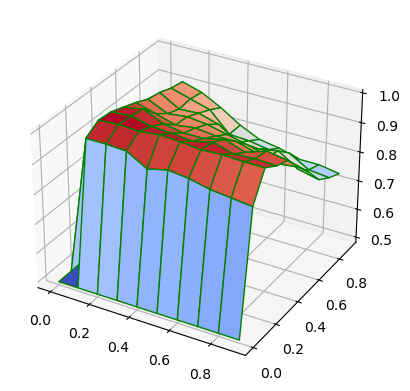

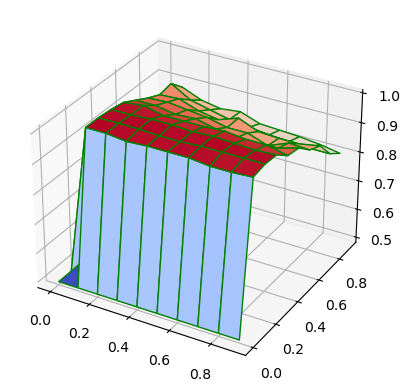

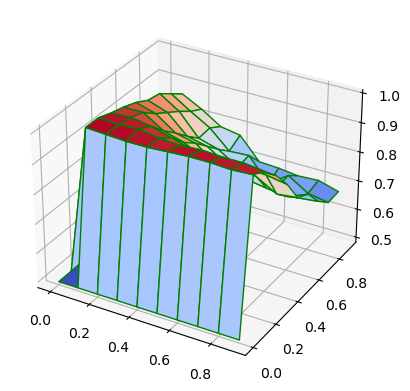

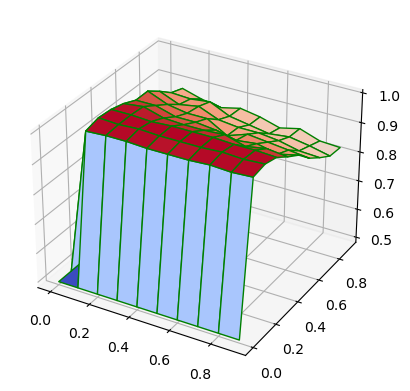

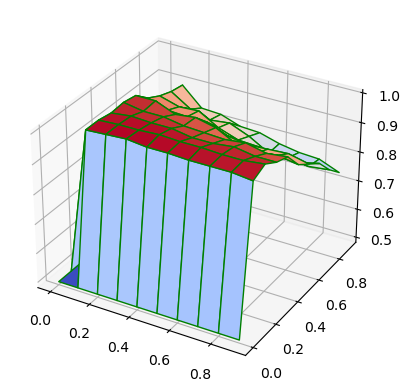

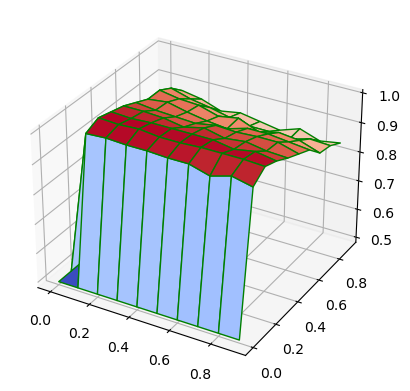

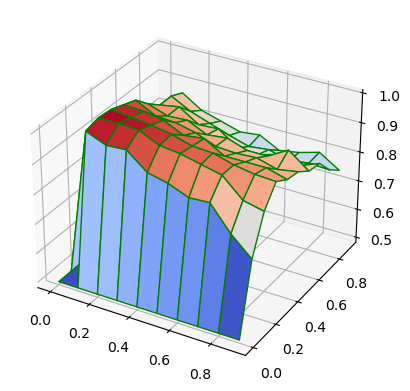

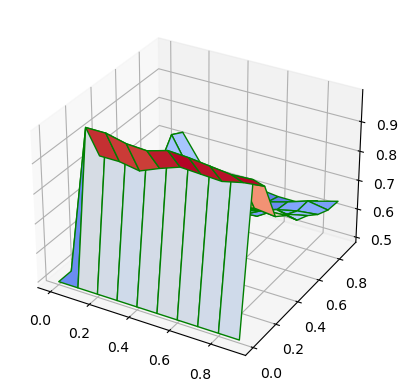

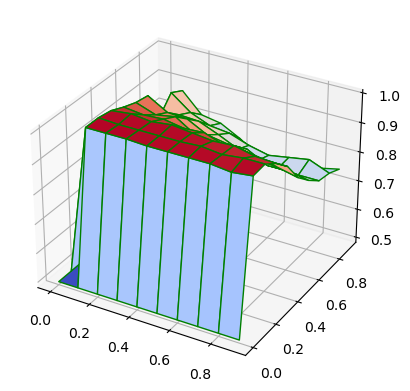

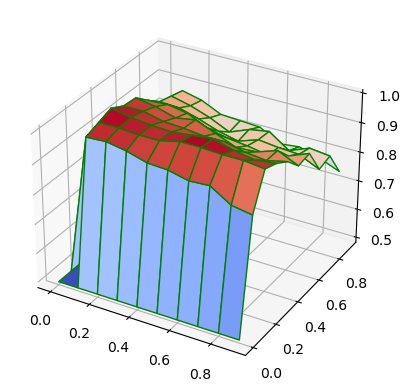

In [13]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input450sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    fig.savefig("3d_plot_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [14]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.98789063, 0.98632812, 0.98242188, 0.96953125,
        0.97109375, 0.965625  , 0.96171875, 0.94804687, 0.93984375],
       [0.4921875 , 0.98398438, 0.98320312, 0.98203125, 0.98007813,
        0.98203125, 0.98085937, 0.97773438, 0.97304687, 0.97148437],
       [0.4921875 , 0.95820313, 0.9578125 , 0.95351562, 0.95859375,
        0.95507812, 0.95625   , 0.95195312, 0.94882813, 0.94648438],
       [0.4921875 , 0.94023437, 0.94335938, 0.92695313, 0.92070312,
        0.925     , 0.9234375 , 0.91992188, 0.91953125, 0.91523438],
       [0.4921875 , 0.93632812, 0.92578125, 0.89882812, 0.89726562,
        0.88359375, 0.88242188, 0.8796875 , 0.87617188, 0.87304688],
       [0.4921875 , 0.91445312, 0.89257812, 0.88125   , 0.86679688,
        0.84921875, 0.8484375 , 0.84140625, 0.8484375 , 0.84375   ],
       [0.4921875 , 0.88828125, 0.8746093

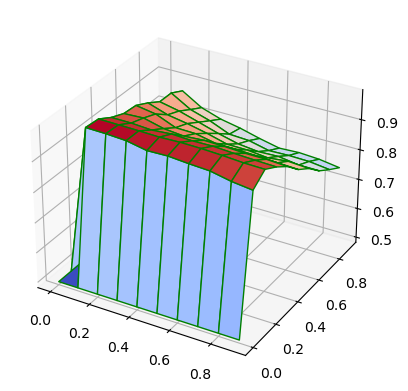

In [15]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
fig.savefig("average_accuracy_grid_over_10_samples.png".format(sample))

In [16]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [17]:
best_w1_w2

(1, 1)

In [18]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [19]:
average_accuracy_grid_10_by_10_10_samples[1]

array([0.4921875 , 0.98789063, 0.98632812, 0.98242188, 0.96953125,
       0.97109375, 0.965625  , 0.96171875, 0.94804687, 0.93984375])

In [20]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.4921875 , 0.98789063, 0.98398438, 0.95820313, 0.94023437,
       0.93632812, 0.91445312, 0.88828125, 0.8875    , 0.86523438])

In [21]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[1])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,1])

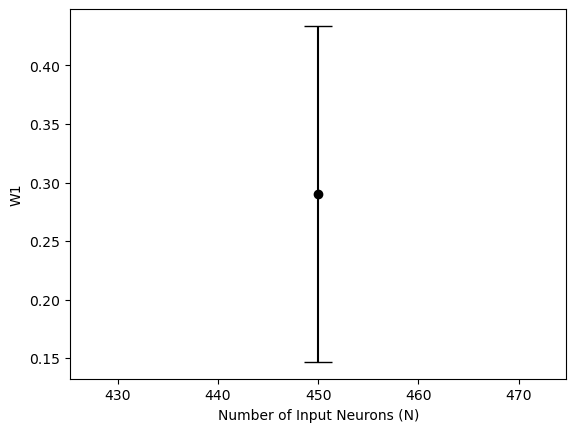

In [22]:
fig, ax = plt.subplots()
ax.scatter(450, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(450, array_best_w1_best_w2[0]/0.3445, std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input450forW1.png")

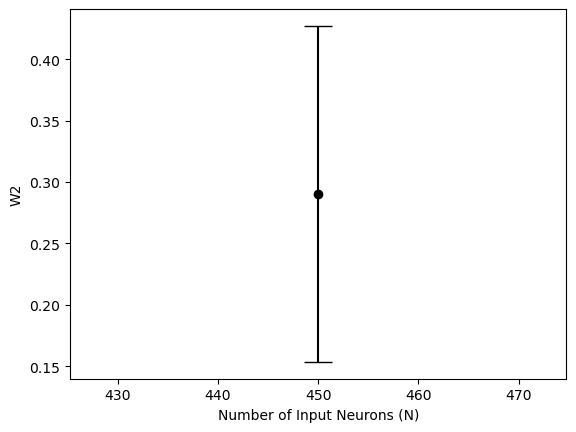

In [23]:
fig2, ax2 = plt.subplots()
ax2.scatter(450, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(450, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input450forW2.png")

In [24]:
data = {}
data['N'] = 450
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("450_input_neurons_w1_w2.npz",**data)